In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(234)

In [2]:
## Load data set
df = pd.read_csv('C:/Users/IZZYLYF/OneDrive/hamoyeGIT/Machine Learning Classification - Managing the Quality Metric of Global Ecological Footprint/footprint-nfa-2019-edition/NFA 2019 public_data.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#DATA EXPLORATION AND PREPROCESSING

In [3]:
print(df.shape)
print (df.describe)
print(sorted(df))
print(df.nunique())   
df.head()

(72186, 12)
<bound method NDFrame.describe of        country  year  country_code        record     crop_land  grazing_land  \
0      Armenia  1992             1    AreaPerCap  1.402924e-01  1.995463e-01   
1      Armenia  1992             1     AreaTotHA  4.830000e+05  6.870000e+05   
2      Armenia  1992             1  BiocapPerCap  1.598044e-01  1.352610e-01   
3      Armenia  1992             1  BiocapTotGHA  5.501762e+05  4.656780e+05   
4      Armenia  1992             1  EFConsPerCap  3.875102e-01  1.894622e-01   
...        ...   ...           ...           ...           ...           ...   
72181    World  2016          5001  BiocapTotGHA  3.984702e+09  1.504757e+09   
72182    World  2016          5001  EFConsPerCap  5.336445e-01  1.402092e-01   
72183    World  2016          5001  EFConsTotGHA  3.984702e+09  1.046937e+09   
72184    World  2016          5001  EFProdPerCap  5.336445e-01  1.402092e-01   
72185    World  2016          5001  EFProdTotGHA  3.984702e+09  1.046937e+

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,0.140292,0.199546,0.097188051,0.036888,0.029320,0.000000,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,483000.000000,687000.000000,334600,127000.000000,100943.000800,0.000000,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,0.159804,0.135261,0.084003213,0.013742,0.033398,0.000000,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,550176.242700,465677.972200,289207.1078,47311.551720,114982.279300,0.000000,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,0.387510,0.189462,1.26E-06,0.004165,0.033398,1.114093,1.728629e+00,3A


In [5]:
#drop un-named columns
#df.drop('Unnamed: 0', axis = 1, inplace = True)


#determine the data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72186 entries, 0 to 72185
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         72186 non-null  object 
 1   year            72186 non-null  int64  
 2   country_code    72186 non-null  int64  
 3   record          72186 non-null  object 
 4   crop_land       51714 non-null  float64
 5   grazing_land    51714 non-null  float64
 6   forest_land     51714 non-null  object 
 7   fishing_ground  51713 non-null  float64
 8   built_up_land   51713 non-null  float64
 9   carbon          51713 non-null  float64
 10  total           72177 non-null  float64
 11  QScore          72185 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 6.6+ MB
None


In [6]:
#to determine the missing entries
df.isnull()

# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
QScore                1
dtype: int64


In [7]:
#check distribution of target variable
df['QScore'].value_counts()
df.isna().sum()

country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
QScore                1
dtype: int64

In [9]:
#droping the rows with missing values.
df.dropna(inplace = True)
df.isna().sum()

country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    0
built_up_land     0
carbon            0
total             0
QScore            0
dtype: int64

In [10]:
print(df.shape)

(51713, 12)


#An obvious change in our target variable after removing the missing values is that there are only three classes left #and from the distribution of the 3 classes, we can see that there is an obvious imbalance between the classes. #There are methods that can be applied to handle this imbalance such as oversampling and undersampling.
#Oversampling involves increasing the number of instances in the class with fewer instances while undersampling #involves reducing the data points in the class with more instances.
#For now, we will convert this to a binary classification problem by combining class '2A' and '1A'.

In [11]:
#reset the dataframe index
df = df.reset_index(drop = True)

In [12]:
#For now, we will convert this to a binary classification problem by combining class '2A' and '1A'.
df['QScore'] = df['QScore'].replace(['1A'], '2A')
df.QScore.value_counts()
#prints

3A    51473
2A      240
Name: QScore, dtype: int64

In [13]:
# Target variable seperation and samples selection
df2A = df[df.QScore=='2A']
df3A = df[df.QScore=='3A'].sample(350)
newdf = df2A.append(df3A)

In [14]:
#to reshuffle the dataset for randomness
import sklearn.utils
ddf = sklearn.utils.shuffle(newdf)
ddf = newdf.reset_index(drop=True)
print(ddf.shape)
ddf.QScore.value_counts()
#prints

(590, 12)


3A    350
2A    240
Name: QScore, dtype: int64

In [16]:
#One of the feature is categorical, so we need to encode it ahead 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
ddf.record = encoder.fit_transform(ddf.record)

#let's preview the encoded feature
ddf.record

0      0
1      1
2      2
3      3
4      4
      ..
585    6
586    0
587    6
588    5
589    7
Name: record, Length: 590, dtype: int64

In [17]:
# from the above, we will be dropping country code, country and year because they are ambiguous to what we want to predict
#and also we will encode the record feature

newddf = df.drop(columns=['country_code', 'country', 'year'])
X = newddf.drop(columns='QScore')
y = newddf['QScore']

In [24]:
print(sorted(newddf))

['QScore', 'built_up_land', 'carbon', 'crop_land', 'fishing_ground', 'forest_land', 'grazing_land', 'record', 'total']


#VISUALIZATION

In [ ]:
#%matplotlib inline
#pd.crosstab(newddf.QScore,newddf.built_up_land).plot(kind='bar')
#plt.title('QScore of built upland')
#plt.xlabel('QScore')
#plt.ylabel('built_up_land')
#plt.savefig('QScore_buL')

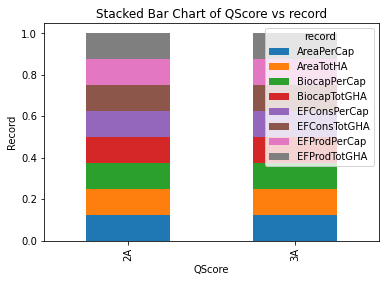

In [27]:
table=pd.crosstab(newddf.QScore,newddf.record)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of QScore vs record')
plt.xlabel('QScore')
plt.ylabel('Record')
plt.savefig('QScore_vs_record')

In [18]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_train.value_counts()
#prints

3A    36022
2A      177
Name: QScore, dtype: int64

In [19]:
#There is still an imbalance in the class distribution. For this, we use SMOTE only on the training data to handle this.
#encode categorical variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x_train.record = encoder.fit_transform(x_train.record)
x_test.record = encoder.transform(x_test.record)


C:\Anaconda\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
#!pip install imblearn

In [20]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train)

In [21]:
#min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_train_df = scaler.fit_transform(x_train_balanced.drop(columns=['record']))
normalised_train_df = pd.DataFrame(normalised_train_df, columns=x_train_balanced.drop(columns=['record']).columns)
normalised_train_df['record'] = x_train_balanced['record']

In [22]:
x_test = x_test.reset_index(drop=True)
normalised_test_df = scaler.transform(x_test.drop(columns=['record']))
normalised_test_df = pd.DataFrame(normalised_test_df, columns=x_test.drop(columns=['record']).columns)
normalised_test_df['record'] = x_test['record']


In [28]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(normalised_train_df, y_balanced)
#returns
# instantiate the model (using the default parameters)
linlogreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
# fit the model with data
print(linlogreg.fit(x_train,y_train))

y_pred=linlogreg.predict(x_test)

print(y_pred)

LogisticRegression()
['3A' '3A' '3A' ... '3A' '3A' '3A']
